# WORD2VEC MODEL

In [165]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from textblob import TextBlob
from pprint import pprint
import pandas as pd
import numpy as np
import csv
import re
% matplotlib inline

## GET SENTENCES (to build library)

In [176]:
df = pd.read_csv('data/161207_ZikaLabels.csv')
sentences = []
for i in range(1000):
    sent = df.diagnosisRAW[i].decode('ISO-8859-2').encode('ASCII','ignore').encode('UTF8').replace(',','').lower().split()
    sentences.append(sent)
# pprint(sentences)

## TRAIN Word2Vec MODEL

In [177]:
## w2v
w2v = Word2Vec(sentences, min_count=1, workers=2)
w2v.similarity('zika','yes')

-0.082568540453080042

## GET WORD VECTORS

In [178]:
labels = set(w2v.index2word)    
vectors = w2v.syn0
tisney = TSNE(n_components=2, random_state=0)
vectors2d = tisney.fit_transform(vectors)

## VISUALIZE SEMANTIC GROUPING OF WORDS (Zika is highlighted in red)

NOTES
- less words were utilized for clarity sake
- no groupings or clusters recognized from TNSE graph

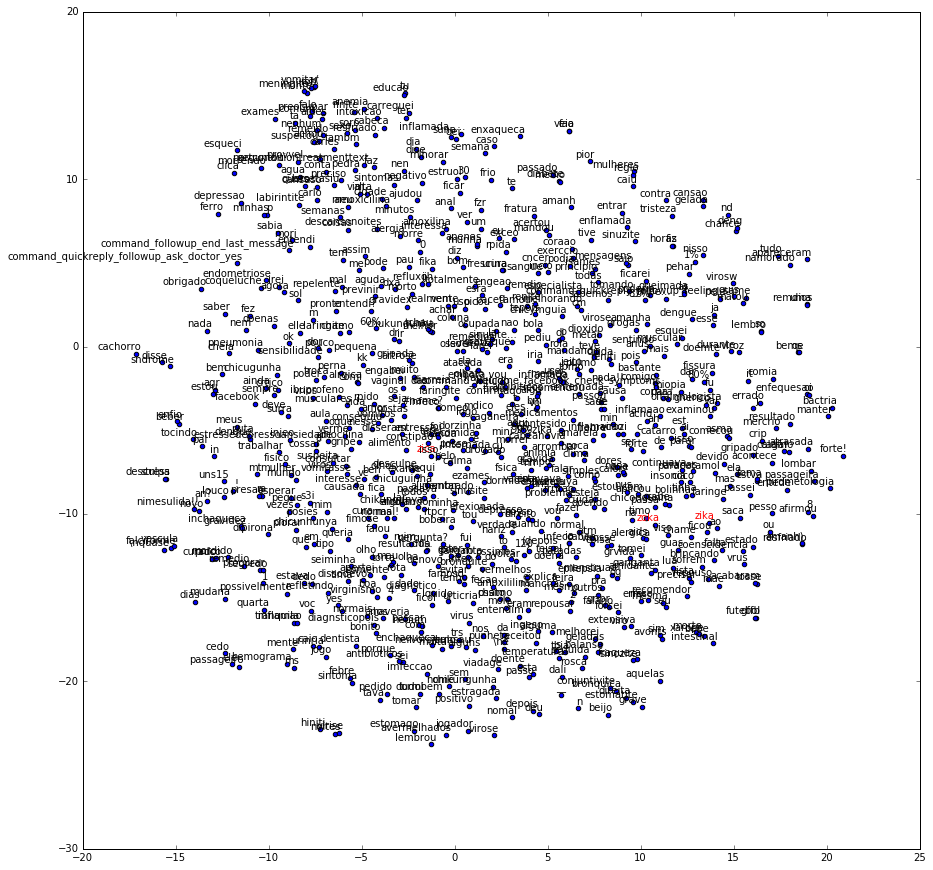

In [208]:
plt.figure(figsize=(15, 15))
for i, label in enumerate(labels):
    if i > 1000:
        break
    x, y = vectors2d[i,:]
    plt.scatter(x, y)
    if label in ['zica','zika','zoka']:
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom',color='r')
    else:
        pass
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom',color='k')
plt.show()